## **Importing Packages**

In [ ]:
!pip install beautifulsoup4 wikipedia

In [ ]:
#Importing relevant packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from bs4 import BeautifulSoup
import wikipedia
import requests

## **Gathering Wikipedia Data**

### List of U.S. states and territories by GDP

In [ ]:
state_gdp_json = {}

page = wikipedia.page("List of U.S. states and territories by GDP")
soup = BeautifulSoup(page.html(), 'html5lib')

table = soup("table")[0]
table = table("tbody")[0]
rows = table("tr")

for row in rows[3:-1]:
    state = row("td")[0]
    state = state("a")[0].text
    state = state.rstrip("\u202f*")

    gdp = row("td")[7].text
    gdp = gdp.lstrip("$")
    gdp = gdp.rstrip()
    gdp = gdp.replace(",", "")
    gdp = int(gdp)

    state_gdp_json[state] = gdp

### List of U.S. states and territories by poverty rate

In [ ]:
poverty_rate_json = {}

page = wikipedia.page("List of U.S. states and territories by poverty rate")
soup = BeautifulSoup(page.html(), 'html5lib')

table = soup("table")[1]
table = table("tbody")[0]
rows = table("tr")
# row

for row in rows[3:-2]:
  state = row("td")[1]
  state = state("a")[0].text
  
  poverty_rate = row("td")[2].text
  poverty_rate = poverty_rate.rstrip("%")
  poverty_rate = float(poverty_rate)

  poverty_rate_json[state] = poverty_rate
  
print(poverty_rate_json)




{'Utah': 8.9, 'Maryland': 9.0, 'Minnesota': 9.0, 'New Jersey': 9.2, 'Colorado': 9.3, 'Hawaii': 9.3, 'Massachusetts': 9.4, 'Washington': 9.8, 'Virginia': 9.9, 'Nebraska': 9.9, 'Connecticut': 10.0, 'Alaska': 10.1, 'Wyoming': 10.1, 'Vermont': 10.2, 'Wisconsin': 10.4, 'North Dakota': 10.6, 'Rhode Island': 10.8, 'Maine': 10.9, 'Idaho': 11.2, 'Iowa': 11.2, 'Delaware': 11.3, 'Kansas': 11.4, 'Oregon': 11.4, 'Illinois': 11.5, 'California': 11.8, 'Indiana': 11.9, 'South Dakota': 11.9, 'Pennsylvania': 12.0, 'Nevada': 12.5, 'Montana': 12.6, 'Florida': 12.7, 'Missouri': 12.9, 'Michigan': 13.0, 'New York': 13.0, 'Ohio': 13.1, 'Arizona': 13.5, '': 13.3, 'District of Columbia': 13.5, 'North Carolina': 13.6, 'Texas': 13.6, 'South Carolina': 13.8, 'Tennessee': 13.9, 'Oklahoma': 15.2, 'Alabama': 15.5, 'West Virginia': 16.0, 'Arkansas': 16.2, 'Kentucky': 16.3, 'New Mexico': 18.2, 'Louisiana': 19.0, 'Mississippi': 20.3}


### List of U.S. states and territories by population

In [ ]:
population_json = {}

page = wikipedia.page("List of U.S. states and territories by population")
soup = BeautifulSoup(page.html(), 'html5lib')

table = soup("table")[0]
table = table("tbody")[0]
rows = table("tr")

for row in rows[2:-8]:
    state = row("th")[0]
    state = state("a")[0].text
    

    population = row("td")[2].text
    population = population.rstrip("\n")
    population = population.replace(",", "")
    population = int(population)

    population_json[state] = population

### List of U.S. states and territories by median age

In [ ]:
median_age_json = {}

page = wikipedia.page("List of U.S. states and territories by median age")
soup = BeautifulSoup(page.html(), 'html5lib')

table = soup ("table")[0]
table = table("tbody")[0]
rows = table("tr")

for row in rows[2:-2]:
    state = row("td")[1]
    state = state("a")[0].text

    MedianAge = row("td")[2].text
    MedianAge = MedianAge.rstrip("\n")
    MedianAge = float(MedianAge)

    median_age_json[state] = MedianAge

### Suicide in the United States

In [ ]:
suicide_rates_json = []

page = wikipedia.page("Suicide in the United States")
soup = BeautifulSoup(page.html(), 'html5lib')

table = soup ("table")[0]
table = table("tbody")[0]
rows = table("tr")

males = rows[1]("td")
females = rows[2]("td")

suicide_rates_json.append(["Males"] + [int(males[i].text) for i in range(8)])
suicide_rates_json.append(["Females"] + [int(females[i].text) for i in range(8)])

suicide_rates = pd.DataFrame(suicide_rates_json, columns=[
    "Sex", "10-14", "15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"
])
suicide_rates = suicide_rates.set_index("Sex")

### List of U.S. states and territories by unemployment rate

In [ ]:
unemployment_rate_json = {}

page = wikipedia.page("List of U.S. states and territories by unemployment rate")
soup = BeautifulSoup(page.html(), 'html5lib')

table = soup("table")[0]
table = table("tbody")[0]
# print(table)
rows = table("tr")

for row in rows[2:-3]:
  state = row("td")[2]
  state = state("a")[0].text
  # print(state)

  unemployment = row("td")[3].text
  # print(unemployment)
  unemployment = unemployment.rstrip("%\n")
  unemployment = float(unemployment)

  unemployment_rate_json[state] = unemployment






In [ ]:
# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP
state_gdp_json = {"District of Columbia":202455,"New York":91459,"Massachusetts":86449,"Washington":82101,"North Dakota":74032,"California":80727,"Connecticut":80888,"Delaware":78924,"Nebraska":68642,"Alaska":72263,"Illinois":69800,"New Jersey":72243,"Wyoming":66832,"Maryland":71426,"Colorado":69475,"Minnesota":68185,"Iowa":62283,"Virginia":65930,"South Dakota":63382,"Texas":62712,"New Hampshire":64846,"Kansas":61076,"Pennsylvania":63193,"Utah":61027,"Hawaii":67395,"Georgia":59465,"Oregon":61106,"Ohio":59566,"Wicsonsin":59807,"North Carolina":57268,"Idiana":56729,"Nevada":58452,"Tennessee":55532,"Rhode Island":58502,"Missouri":53818,"Vermont":54515,"Michigan":53590,"Florida":52217,"Arizona":51865,"Louisiana":53996,"Maine":50832,"Montana":49856,"Kentucky":48484,"Oklahoma":49445,"New Mexico":49838,"South Carolina":48138,"West Virginia":42614,"Idaho":48033,"Alabama":46875,"Arkansas":43691,"Mississippi":39347}

# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population
population_json = {"Alabama":5024279,"Alaska":733391,"Arizona":7151502,"Arkansas":3011524,"California":39538223,"Colorado":5773714,"Connecticut":3605944,"Delaware":989948,"District of Columbia":689545,"Florida":21538187,"Georgia":10711908,"Hawaii":1455271,"Idaho":1839106,"Illinois":12812508,"Indiana":6785528,"Iowa":3190369,"Kansas":2937880,"Kentucky":4505836,"Louisiana":4657757,"Maine":1362359,"Maryland":6177224,"Massachusetts":7029917,"Michigan":10077331,"Minnesota":5706494,"Mississippi":2961279,"Missouri":6154913,"Montana":1084225,"Nebraska":1961504,"Nevada":3104614,"New Hampshire":1377529,"New Jersey":9288994,"New Mexico":2117522,"New York":20201249,"North Carolina":10439388,"North Dakota":779094,"Ohio":11799448,"Oklahoma":3959353,"Oregon":4237256,"Pennsylvania":13002700,"Rhode Island":1097379,"South Carolina":5118425,"South Dakota":886667,"Tennessee":6910840,"Texas":29145505,"Utah":3271616,"Vermont":643077,"Virginia":8631393,"Washington":7705281,"West Virginia":1793716,"Wisconsin":5893718,"Wyoming":576851}

# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_age
median_age_json = {"Maine":45,"New Hampshire":43.1,"Vermont":43,"West Virginia":42.9,"Florida":42.5,"Connecticut":41.1,"Delaware":41.1,"Pennsylvania":40.8,"Rhode Island":40.1,"New Jersey":40.1,"Montana":40.1,"Michigan":39.9,"South Carolina":39.9,"Wisconsin":39.8,"Massachusetts":39.6,"Oregon":39.6,"Hawaii":39.6,"Ohio":39.5,"Alabama":39.4,"New York":39.2,"Kentucky":39.1,"North Carolina":39.1,"Maryland":39.1,"Tennessee":39,"Missouri":38.9,"Virginia":38.6,"Illinois":38.6,"Arkansas":38.5,"Iowa":38.5,"New Mexico":38.4,"Wyoming":38.4,"Minnesota":38.3,"Nevada":38.3,"Arizona":38.2,"Mississippi":38,"Indiana":37.9,"Washington":37.8,"Louisiana":37.5,"South Dakota":37.4,"Colorado":37.1,"Georgia":37.1,"Kansas":37.1,"California":37,"Oklahoma":36.9,"Idaho":36.9,"Nebraska":36.8,"North Dakota":35.3,"Texas":35,"Alaska":35,"District of Columbia":34.2,"Utah":31.3}



### JSON for Birth Rate

In [ ]:
# https://www.cdc.gov/nchs/pressroom/sosmap/fertility_rate/fertility_rates.htm
birth_rates_json = {
    "North Dakota": 67.4,
    "South Dakota": 66.7,
    "Alaska": 65.7,
    "Nebraska": 64.7,
    "Utah": 64.1,
    "Louisiana": 62.2,
    "Kansas": 61.1,
    "Hawaii": 61.1,
    "Oklahoma": 61.0,
    "Mississippi": 61.0,
    "Idaho": 60.9,
    "Kentucky": 60.8,
    "Arkansas": 60.7,
    "Alabama": 60.6,
    "Iowa": 60.4,
    "Texas": 60.2,
    "Indiana": 59.8,
    "Missouri": 58.7,
    "New Jersey": 58.6,
    "Tennessee": 58.5,
    "Ohio": 58.3,
    "Minnesota": 58.3,
    "Maryland": 57.7,
    "Delaware": 57.0,
    "Wyoming": 56.4,
    "North Carolina": 56.2,
    "South Carolina": 55.9,
    "Virginia": 55.8,
    "Georgia": 55.7,
    "Michigan": 55.6,
    "Wisconsin": 55.4,
    "West Virginia": 55.3,
    "Pennsylvania": 54.9,
    "Nevada": 54.8,
    "New York": 54.6,
    "Montana": 54.3,
    "Washington": 54.0,
    "Arizona": 54.0,
    "Illinois": 53.8,
    "Florida": 53.4,
    "California": 52.4,
    "Colorado": 51.5,
    "Connecticut": 49.9,
    "Maine": 49.2,
    "Rhode Island": 48.7,
    "Oregon": 47.8,
    "New Hampshire": 47.7,
    "Massachusetts": 47.6,
    "Vermont": 44.7
}

### JSON for depression rate

In [ ]:
# https://www.americashealthrankings.org/explore/annual/measure/Depression_a/state/ALL
depression_rates_json = {
    "Hawaii": 12.7,
    "California": 14.1,
    "Florida": 14.7,
    "Illinois": 14.7,
    "New Jersey": 15.2,
    "Delaware": 15.6,
    "Maryland": 15.7,
    "Alaska": 15.9,
    "South Dakota": 16.1,
    "Nebraska": 16.8,
    "New York": 16.8,
    "Georgia": 17.2,
    "Virginia": 17.2,
    "Arizona": 17.4,
    "Iowa": 17.4,
    "Nevada": 17.6,
    "New Mexico": 17.6,
    "Connecticut": 17.7,
    "Texas": 17.7,
    "Massachusetts": 17.9,
    "Wyoming": 18.3,
    "Colorado": 18.5,
    "Idaho": 18.9,
    "Kansas": 19.2,
    "North Dakota": 19.2,
    "Michigan": 19.5,
    "Minnesota": 19.8,
    "Wisconsin": 19.8,
    "Pennsylvania": 20.2,
    "North Carolina": 20.8,
    "Mississippi": 20.9,
    "Rhode Island": 21.1,
    "Oregon": 21.2,
    "South Carolina": 21.4,
    "New Hampshire": 21.5,
    "Indiana": 21.9,
    "Ohio": 22.0,
    "Maine": 22.1,
    "Montana": 22.6,
    "Missouri": 22.8,
    "Oklahoma": 22.9,
    "Utah": 23.1,
    "Vermont": 23.3,
    "Washington": 23.4,
    "Alabama": 23.5,
    "Arkansas": 23.5,
    "Louisiana": 23.5,
    "Tennessee": 24.1,
    "Kentucky": 24.2,
    "West Virginia": 26.4,
    "District of Columbia": 19.8,
}

### JSON for Adult Obesity 

In [ ]:
# https://stateofchildhoodobesity.org/adult-obesity/
obesity_rates_json = {
    "Mississippi": 39.7,
    "West Virginia": 39.1,
    "Alabama": 39.0,
    "Louisiana": 38.1,
    "Indiana": 36.8,
    "Kentucky": 36.6,
    "Delaware": 36.5,
    "Iowa": 36.5,
    "Arkansas": 36.4,
    "Oklahoma": 36.4,
    "South Carolina": 36.2,
    "Texas": 35.8,
    "Tennessee": 35.6,
    "Ohio": 35.5,
    "Kansas": 35.3,
    "Michigan": 35.2,
    "Georgia": 34.3,
    "Missouri": 34.0,
    "Nebraska": 34.0,
    "North Carolina": 33.6,
    "South Dakota": 33.2,
    "North Dakota": 33.1,
    "Illinois": 32.4,
    "Wisconsin": 32.3,
    "Virginia": 32.2,
    "Alaska": 31.9,
    "Pennsylvania": 31.5,
    "Idaho": 31.1,
    "Maine": 31.0,
    "Maryland": 31.0,
    "Arizona": 30.9,
    "New Mexico": 30.9,
    "Minnesota": 30.7,
    "Wyoming": 30.7,
    "California": 30.3,
    "Rhode Island": 30.1,
    "New Hampshire": 29.9,
    "Connecticut": 29.2,
    "Nevada": 28.7,
    "Utah": 28.6,
    "Montana": 28.5,
    "Florida": 28.4,
    "Oregon": 28.1,
    "Washington": 28.0,
    "New Jersey": 27.7,
    "New York": 26.3,
    "Vermont": 26.3,
    "Hawaii": 24.5,
    "Massachusetts": 24.4,
    "District of Columbia": 24.3,
    "Colorado": 24.2
}

## **Combining Datasets**

In [ ]:
def json_to_dataframe(json, column_name):
    df = pd.DataFrame.from_dict(json, orient="index", columns=[column_name])
    df.index.name = "State"
    return df.reset_index()

#Creating dataframe from JSON
state_gdp = json_to_dataframe(state_gdp_json, "GDP")
birth_rates = json_to_dataframe(birth_rates_json, "FertilityRate")
depression_rates = json_to_dataframe(depression_rates_json, "DepressionRate")
state_population = json_to_dataframe(population_json, "Population")
state_median_age = json_to_dataframe(median_age_json, "MedianAge")
obesity_rates = json_to_dataframe(obesity_rates_json, "ObesityRate")
unemployment_rate = json_to_dataframe(unemployment_rate_json, "Unemployment")
poverty_rate = json_to_dataframe(poverty_rate_json, "PovertyRate")

#Merging datasets on "State"
merged = state_gdp.merge(birth_rates, on="State")
merged = merged.merge(depression_rates, on="State")
merged = merged.merge(state_population, on= "State")
merged = merged.merge(state_median_age, on= "State")
merged = merged.merge(obesity_rates, on= "State")
merged = merged.merge(unemployment_rate, on= "State")
merged = merged.merge(poverty_rate, on ="State")

merged.head(5)


,State,GDP,FertilityRate,DepressionRate,Population,MedianAge,ObesityRate,Unemployment,PovertyRate
0,New York,91459,54.6,16.8,20201249,39.2,26.3,7.1,13.0
1,Massachusetts,86449,47.6,17.9,7029917,39.6,24.4,5.2,9.4
2,Washington,82101,54.0,23.4,7705281,37.8,28.0,4.9,9.8
3,North Dakota,74032,67.4,19.2,779094,35.3,33.1,3.5,10.6
4,California,80727,52.4,14.1,39538223,37.0,30.3,7.5,11.8


## **Analysis**

#### **Is there any relationship between PovertyRate and GDP?**

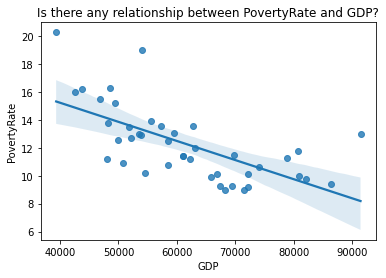

GDP and PovertyRate: -0.6543341644002855, p-value: 2.6007222789951558e-06


In [ ]:
sns.regplot(data=merged, x= "GDP" , y="PovertyRate")
plt.title("Is there any relationship between PovertyRate and GDP?") 
plt.show()

results, p_value = stats.pearsonr(merged.GDP , merged.PovertyRate)
print(f"GDP and PovertyRate: {results}, p-value: {p_value}")

#### **Does Population Affect Unemployment Rate?**


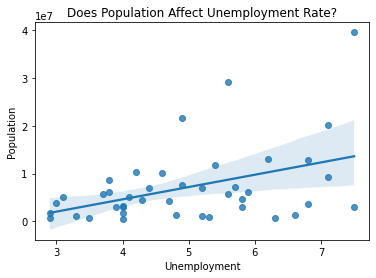

UnemploymentRate and Population: 0.4274555843380923, p-value: 0.00474984433934654


In [ ]:
sns.regplot(data=merged, x= "Unemployment" , y="Population")
plt.title("Does Population Affect Unemployment Rate?")
plt.show()

results, p_value = stats.pearsonr(merged.Unemployment , merged.Population)
print(f"UnemploymentRate and Population: {results}, p-value: {p_value}")

**Calculating the mean and standard deviation for GDP and unemployment:**

In [ ]:
print(merged.GDP.mean())
print(merged.Unemployment.mean())

print(merged.GDP.std())
print(merged.Unemployment.std())

61550.833333333336
4.957142857142859
12619.485504020317
1.315969985783992


#### **Does Having a Higher GDP Fix Unemployment Rate?**

GDP and Unemployment: 0.5120063264574659, p-value: 0.0005281900578990873


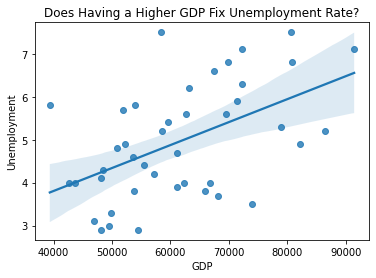

In [ ]:
results, p_value = stats.pearsonr(merged.GDP , merged.Unemployment)
print(f"GDP and Unemployment: {results}, p-value: {p_value}")

sns.regplot(data=merged, x= "GDP" , y="Unemployment")
plt.title("Does Having a Higher GDP Fix Unemployment Rate?")
plt.show()

#### **Depression Rate and GDP**

GDP and DepressionRate: -0.5902675127042628, p-value: 3.880933211281247e-05


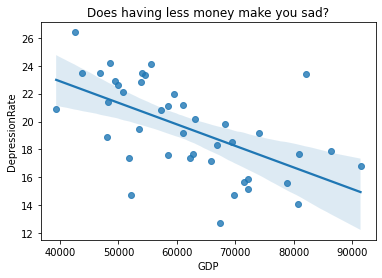

In [ ]:
results, p_value = stats.pearsonr(merged.GDP , merged.DepressionRate)
print(f"GDP and DepressionRate: {results}, p-value: {p_value}")

sns.regplot(data=merged, x="GDP", y="DepressionRate")
plt.title("Does having less money make you sad?")
plt.show()

#### **GDP & Population**

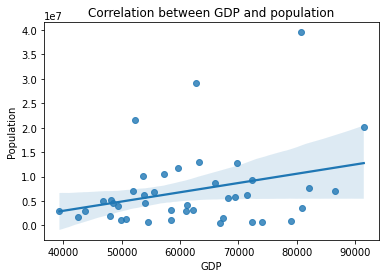

In [ ]:
sns.regplot(data=merged, x="GDP", y="Population")
plt.title("Correlation between GDP and population")
plt.show()

#### **How's the Fertility Rate for Median Age?**


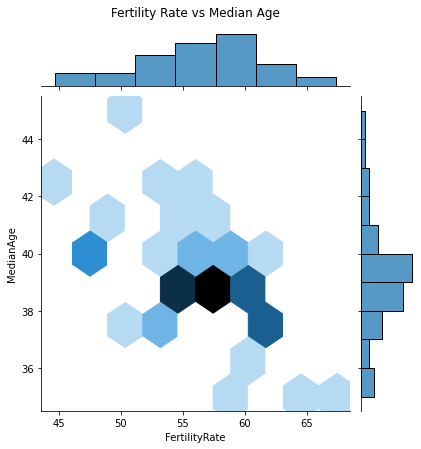

In [ ]:
sns.jointplot(data=merged, x="FertilityRate", y="MedianAge", kind="hex")
plt.title("Fertility Rate vs Median Age", pad=80)
plt.show()

#### **Does having more money mean you're healthy?**

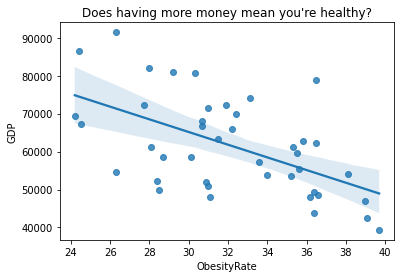

In [ ]:
sns.regplot(data=merged, x="ObesityRate", y="GDP")
plt.title("Does having more money mean you're healthy?")
plt.show()

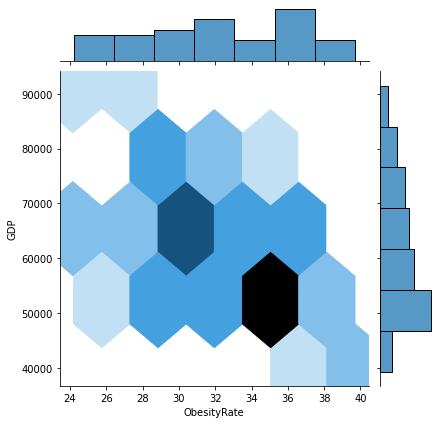

In [ ]:
sns.jointplot(y='GDP', x= 'ObesityRate',data=merged, kind='hex')

#### **Do men commit suicide more often than women?**

Men are 4.12x more likely to commit suicide than women. P-value: 0.00104


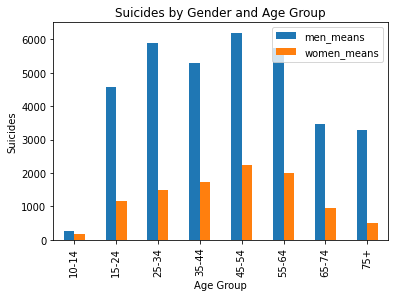

In [ ]:

stat, p_value = stats.ttest_ind(suicide_rates.iloc[0].values, suicide_rates.iloc[1].values)
print(f"Men are {stat:.2f}x more likely to commit suicide than women. P-value: {p_value:.5f}")

df = pd.DataFrame(
    {'labels': ["10-14", "15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"],
     'men_means': suicide_rates.iloc[0].values,
     'women_means': suicide_rates.iloc[1].values
    })

df.plot(x="labels", y=["men_means", "women_means"], kind="bar")

plt.title("Suicides by Gender and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Suicides")
plt.show()

####  **Suicides by Gender (Box Plot)**

Text(0, 0.5, 'Total Deaths by Suicide')

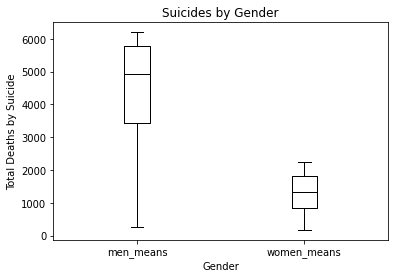

In [ ]:
df.plot(x="labels", y=["men_means", "women_means"], kind="box", grid = False, color = "Black", labels=None)

plt.title("Suicides by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Deaths by Suicide")

## --- **More Analysis** ---

#### **Pie Chart for Top 5 Highest GDP States**




In [ ]:
# Creating a variable of Top and sorting values by descending order.
highestGDP = merged.sort_values(by='GDP',ascending=False).head(5)

#Resetting index for decending values 
highestGDP.reset_index(drop=True, inplace=True )

#Sorting values with "total GDP"
highestGDP=highestGDP.sort_values(by='GDP')

x = highestGDP['State']
y = highestGDP['GDP']

forPieChart = highestGDP['GDP']

highestGDP[['State', 'GDP']]

,State,GDP
4,California,80727
3,Connecticut,80888
2,Washington,82101
1,Massachusetts,86449
0,New York,91459


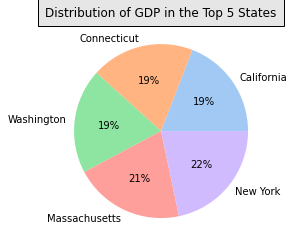

In [ ]:
colors = sns.color_palette('pastel')[0:5]
labels = highestGDP['State']

plt.pie(forPieChart, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Distribution of GDP in the Top 5 States", bbox={'facecolor':'0.9', 'pad':7})
plt.show()

#### **Top 5 Happiest States in USA**

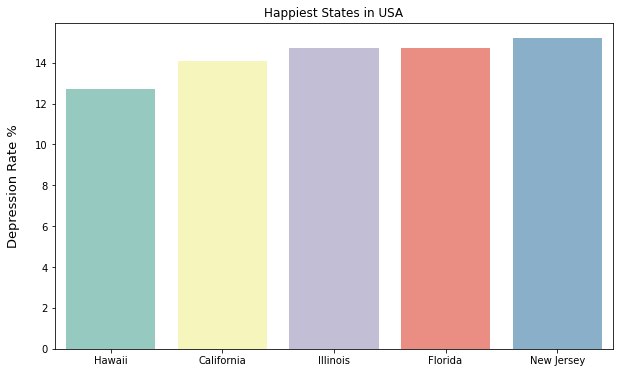

In [ ]:
# Creating a variable of Happiest States and sorting values by descending order.
gdpStates = merged.sort_values(by='DepressionRate',ascending=True).head(5)

#Resetting index for decending values 
gdpStates.reset_index(drop=True, inplace=True )

#Sorting values with "total death"
gdpStates=gdpStates.sort_values(by='DepressionRate')

x = gdpStates['State']
y = gdpStates['DepressionRate']

#Visualization

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='State',y='DepressionRate',data=gdpStates, palette='Set3')
ax.set_xlabel (" ")
ax.set_ylabel ("Depression Rate %",labelpad=15)
ax.set_title("Happiest States in USA")
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)
# plt.xticks(rotation=90)
plt.show()

#### **Saddest States in USA**

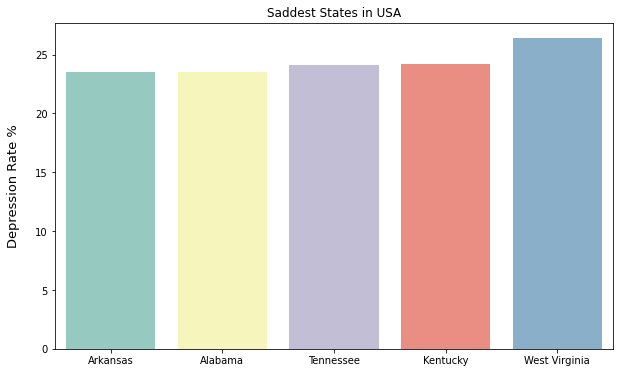

In [ ]:
gdpStates = merged.sort_values(by='DepressionRate',ascending=False).head(5)

#Resetting index for decending values 
gdpStates.reset_index(drop=True, inplace=True )

gdpStates=gdpStates.sort_values(by='DepressionRate')

x = gdpStates['State']
y = gdpStates['DepressionRate']

#Visualization
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='State',y='DepressionRate',data=gdpStates, palette='Set3')
ax.set_xlabel (" ")
ax.set_ylabel ("Depression Rate %",labelpad=15)
ax.set_title("Saddest States in USA")
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)
# plt.xticks(rotation=90)
plt.show()